In [77]:
from pathlib import Path
import numpy as np
import pandas as pd
import seaborn as sns

data_root = Path("./results")
hflop_root = data_root / "hflop"
hier_root = data_root / "hier"
flat_root = data_root / "non_hier"

assert hflop_root.is_dir() and hier_root.is_dir() and flat_root.is_dir()

In [78]:
calcs_hflop = pd.read_csv(hflop_root / "calculations.txt", header=None)
latencies_hflop = pd.read_csv(hflop_root / "latencies.txt", header=None)
calcs_hflop = calcs_hflop * 1
speedups = np.linspace(0, 95, 21)
df_hflop = pd.DataFrame([(s, val[0]) for s in speedups for val in calcs_hflop.to_numpy()], columns=['speedup', 'value'])

latencies_rep = np.tile(latencies_hflop.values.reshape(-1), len(speedups))
df_hflop["e2e"] = df_hflop["value"] + latencies_rep 
print(len(df_hflop))

42000


In [79]:
speedups = np.linspace(0, 95, 21)
print(speedups)

calcs_hier = pd.read_csv(hier_root / "calculations.txt", header=None)
latencies_hier = pd.read_csv(hier_root / "latencies.txt", header=None)
calcs_hier = calcs_hier * 1
# gp1 clients have speed ups
latencies_gp1 = latencies_hier[latencies_hier[0] > 0.01]
calcs_gp1 = calcs_hier.loc[latencies_gp1.index]
latencies_gp2 = latencies_hier[latencies_hier[0] <= 0.01]
calcs_gp2 = calcs_hier.loc[latencies_gp2.index]

# apply speedup for the two client
df_hier_gp1 = pd.DataFrame([(s, val[0] * (1 - (s / 100.))) for s in speedups for val in calcs_gp1.to_numpy()], columns=['speedup', 'value'])

# "static" 0 speedup for other clients
df_hier_gp2 = pd.DataFrame([(s, val[0]) for s in speedups for val in calcs_gp2.to_numpy()], columns=['speedup', 'value'])

latencies_gp1_rep = np.tile(latencies_gp1.values.reshape(-1), len(speedups))
latencies_gp2_rep = np.tile(latencies_gp2.values.reshape(-1), len(speedups))

df_hier_gp1["e2e"] = df_hier_gp1["value"] + latencies_gp1_rep
df_hier_gp2["e2e"] = df_hier_gp2["value"] + latencies_gp2_rep
# 

df_hier = pd.concat([df_hier_gp1, df_hier_gp2])

[ 0.    4.75  9.5  14.25 19.   23.75 28.5  33.25 38.   42.75 47.5  52.25
 57.   61.75 66.5  71.25 76.   80.75 85.5  90.25 95.  ]


In [80]:
len(calcs_gp1)

200

In [81]:
assert all(df_hier_gp2["value"].to_numpy()[1800:3600] == df_hier_gp2["value"].to_numpy()[0:1800])

In [82]:
df_hier_gp1[2000:]

,speedup,value,e2e
2000,47.5,0.002036,0.072638
2001,47.5,0.002352,0.072955
2002,47.5,0.040853,0.136500
2003,47.5,0.001373,0.097021
2004,47.5,0.001874,0.097521
...,...,...,...
4195,95.0,0.000200,0.070803
4196,95.0,0.000155,0.095802
4197,95.0,0.000244,0.070847
4198,95.0,0.000705,0.071308


In [83]:
print(df_hier[df_hier["speedup"] == 0.0]["e2e"].mean())
print(df_hier[df_hier["speedup"] > 0.0]["e2e"].mean())

0.017716505483136635
0.01745097270135687


In [84]:
print(calcs_gp2[0].mean())
print(calcs_gp1[0].mean())

0.003451026678085281
0.005323965549468946


In [85]:
calcs_flat = pd.read_csv(flat_root / "calculations.txt", header=None)
latencies = pd.read_csv(flat_root / "latencies.txt", header=None)
calcs_flat = calcs_flat * 1

# reduce not incrase time 
df_flat = pd.DataFrame([(s, val[0] * (1 - (s / 100.))) for s in speedups for val in calcs_flat.to_numpy()], columns=['speedup', 'value'])

assert len(df_flat) == len(speedups) * len(calcs_flat)
assert len(df_flat) == len(df_hier)

latencies_rep = np.tile(latencies.values.reshape(-1), len(speedups))
assert all(latencies_rep[2000:4000] == latencies_rep[0:2000])
df_flat["e2e"] = df_flat["value"] + latencies_rep 
print(df_flat)

       speedup     value       e2e
0          0.0  0.050594  0.144479
1          0.0  0.001880  0.072435
2          0.0  0.003478  0.070290
3          0.0  0.002418  0.077591
4          0.0  0.002943  0.094837
...        ...       ...       ...
41995     95.0  0.000205  0.078201
41996     95.0  0.000030  0.064424
41997     95.0  0.000141  0.094026
41998     95.0  0.000172  0.098911
41999     95.0  0.000077  0.054297

[42000 rows x 3 columns]


In [86]:
df_flat[4000:]

,speedup,value,e2e
4000,9.5,0.045788,0.139673
4001,9.5,0.001702,0.072256
4002,9.5,0.003148,0.069960
4003,9.5,0.002188,0.077361
4004,9.5,0.002663,0.094557
...,...,...,...
41995,95.0,0.000205,0.078201
41996,95.0,0.000030,0.064424
41997,95.0,0.000141,0.094026
41998,95.0,0.000172,0.098911


In [87]:
calcs_flat

,0
0,0.050594
1,0.001880
2,0.003478
3,0.002418
4,0.002943
...,...
1995,0.004096
1996,0.000602
1997,0.002827
1998,0.003440


       speedup     value       e2e        Method
0          0.0  0.003877  0.074480  Hierarchical
1          0.0  0.004481  0.075084  Hierarchical
2          0.0  0.077815  0.173462  Hierarchical
3          0.0  0.002616  0.098263  Hierarchical
4          0.0  0.003570  0.099217  Hierarchical
...        ...       ...       ...           ...
37795     95.0  0.002904  0.012450  Hierarchical
37796     95.0  0.000854  0.009595  Hierarchical
37797     95.0  0.002303  0.007362  Hierarchical
37798     95.0  0.001627  0.008159  Hierarchical
37799     95.0  0.004367  0.009234  Hierarchical

[42000 rows x 4 columns]
       speedup     value       e2e            Method
0          0.0  0.050594  0.144479  Non-Hierarchical
1          0.0  0.001880  0.072435  Non-Hierarchical
2          0.0  0.003478  0.070290  Non-Hierarchical
3          0.0  0.002418  0.077591  Non-Hierarchical
4          0.0  0.002943  0.094837  Non-Hierarchical
...        ...       ...       ...               ...
41995     95.0 

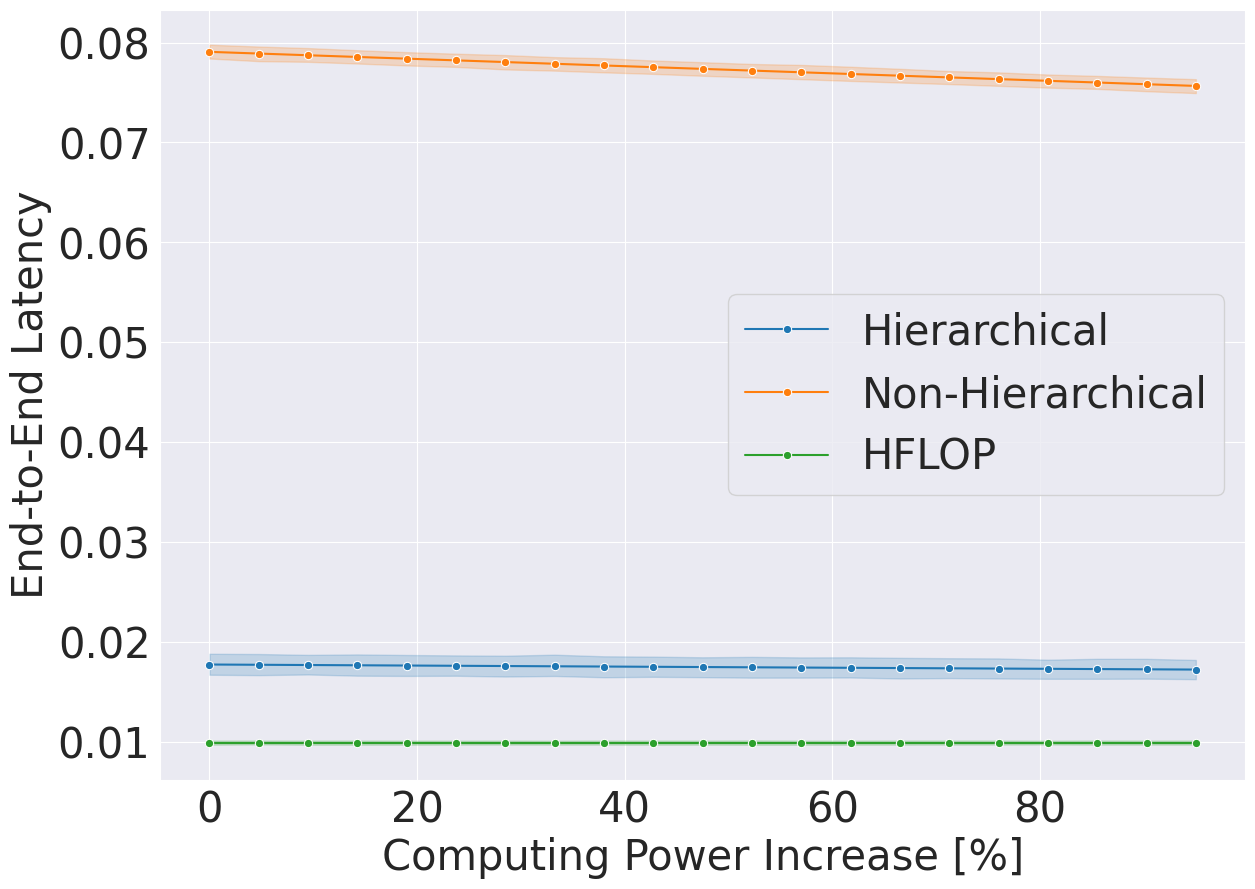

In [88]:
import matplotlib.lines as mlines
import matplotlib.pyplot as plt

df_hier["Method"] = "Hierarchical"
df_flat["Method"] = "Non-Hierarchical"
df_hflop["Method"] = "HFLOP"

df_res =  pd.concat([df_hier, df_flat, df_hflop])
print(df_hier)
print(df_flat)
plt.figure(figsize=(14,10)) 
plot = sns.lineplot(x='speedup', y='e2e', hue='Method', data=df_res, errorbar='ci', marker='o')

# hflops_constant = df_hflop["e2e"].mean()
# plt.axhline(y=hflops_constant, color="r")

# Make a legend for the meaning of the line color.
# red_line = mlines.Line2D([], [], color='red', label='HFLOP')

# Get the current legend
leg = plot.legend_
plt.xticks(fontsize=30.0)
plt.yticks(fontsize=30.0)
# Manually update the legend
# leg.get_lines().append(red_line)
# leg.get_texts().append(plt.text(0, 0, 'HFLOP'))

# Update the legend with the custom legend
plot.legend(fontsize=30.0)#handles=leg.legendHandles + [red_line])
plt.title('')
# plot.xticks(rotation=90, size=30.0)
# plot.yticks(rotation=90, size=30.0)
plt.xlabel('Computing Power Increase [%]', size=30.0)
plt.ylabel('End-to-End Latency', size=30.0)
plt.savefig("speedups_1.png")
plt.show()